# Napqueen (Anarx.ai) Assignment
## Name: Abhineet Raj

# Importing Libaries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Loading Dataset

In [103]:
data=pd.read_csv('/content/Global-Superstore - Global-Superstore.csv.csv')

In [104]:
#Head of the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [105]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
8901,41216,CA-2013-149272,3/16/2013,3/20/2013,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5.0,0.3,-143.4310,37.70,High
8902,42494,TU-2011-4150,11/21/2011,11/21/2011,Same Day,LR-6915,Lena Radford,Consumer,Turgutlu,Manisa,...,FUR-SAF-10004664,Furniture,Chairs,"SAFCO Steel Folding Chair, Set of Two",140.736,4.0,0.6,-59.9040,37.70,High
8903,39117,CA-2014-152436,12/9/2014,12/11/2014,Second Class,CW-11905,Carl Weiss,Home Office,Cranston,Rhode Island,...,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,592.740,6.0,0.0,160.0398,37.69,High
8904,41808,MO-2012-8580,9/26/2012,9/30/2012,Second Class,JW-6075,Julia West,Consumer,Marrakech,Marrakech-Tensift-El Haouz,...,TEC-EPS-10004328,Technology,Machines,"Epson Printer, Durable",262.740,1.0,0.0,99.8400,37.69,High
8905,25361,IN-2014-23649,7/23/2014,7/27/2014,Standard Class,HA-14920,Helen Andreada,Consumer,Albury,New South Wales,...,TEC-AC-10002688,Technology,Accessori,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Exploration & Pre-Processing

In [106]:
#Shape of the dataset
data.shape

(8906, 24)

The above output tell that the dataset contains 8906 rows and 24 columns.

In [107]:
#Column names present in the dataset
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

We can clearly see that there are 24 columns present in the dataset.

In [108]:
#Column data type
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


From the following it says that most of the columns are of Object(String) data and some are float and rest are integer data type.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8906 entries, 0 to 8905
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          8906 non-null   int64  
 1   Order ID        8906 non-null   object 
 2   Order Date      8906 non-null   object 
 3   Ship Date       8906 non-null   object 
 4   Ship Mode       8906 non-null   object 
 5   Customer ID     8906 non-null   object 
 6   Customer Name   8906 non-null   object 
 7   Segment         8906 non-null   object 
 8   City            8906 non-null   object 
 9   State           8906 non-null   object 
 10  Country         8906 non-null   object 
 11  Postal Code     1548 non-null   float64
 12  Market          8906 non-null   object 
 13  Region          8906 non-null   object 
 14  Product ID      8906 non-null   object 
 15  Category        8906 non-null   object 
 16  Sub-Category    8906 non-null   object 
 17  Product Name    8905 non-null   o

There are categorical and numerical data in this dataset.
1. **Categorical columns**: Ship mode,Segment,City,State,Region,Category,Subcategory,Order Priority

2. **Numerical columns**: Quantity,Sales,Profit,Discount,Shipping Cost

In [110]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,8906.000000,1548.000000,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000
mean,23974.132270,54803.573643,893.853313,4.740483,0.105651,121.477566,109.261354
std,13489.625903,32860.650317,809.465236,2.550462,0.159262,371.185315,101.019619
min,21.000000,1841.000000,84.600000,1.000000,0.000000,-6599.978000,37.690000
25%,13186.250000,21215.000000,409.770000,3.000000,0.000000,14.280000,51.240000
50%,23397.500000,54897.500000,659.424000,4.000000,0.000000,91.560000,73.410000
75%,33969.500000,90032.000000,1085.553000,6.000000,0.200000,219.441600,124.630000
max,51284.000000,99301.000000,17499.950000,14.000000,0.850000,8399.976000,933.570000


From the following table we can observe that:
1. **Sales**: Sales range from 84.60 to 17,499.95, with an average of 893.85 and a standard deviation of 809.47. The 25th percentile is 409.77, the median is 659.42, and the 75th percentile is 1,085.55, indicating substantial variability and a few high-value transactions.

2. **Quantity**: Quantity sold ranges from 1 to 14 items per transaction, averaging 4.74 with a standard deviation of 2.55. The 25th percentile is 3, the median is 4, and the 75th percentile is 6, showing most transactions involve a modest number of items.

3. **Discount**: Discounts vary from 0% to 85%, averaging 10.6% with a standard deviation of 15.9%. The 25th and 50th percentiles are 0%, and the 75th percentile is 20%, indicating most transactions have low or no discount, with some having substantial discounts.

4. **Profit**: Profits range from -6,599.98 to 8,399.98, with an average of 121.48 and a standard deviation of 371.19. The 25th percentile is 14.28, the median is 91.56, and the 75th percentile is 219.44, highlighting both significant losses and high profits.

5. **Shipping Cost**: Shipping costs vary from 37.69 to 933.57, with an average of 109.26 and a standard deviation of 101.02. The 25th percentile is 51.24, the median is 73.41, and the 75th percentile is 124.63, reflecting a broad range of shipping expenses.


In [111]:
#Null values identification
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In postal code there are many missing values and only 1 missing values are there in column starting from 'ProductName' to 'Order Priority' and rest other columns does not have any missing values.
**Note: Since in postal code there are many missing value and if tried to remove those columns it can lead to a problem that proper visulization cannot be done as amount of dataset can be reduce.**

In [112]:
#Removal of unnecessary columns
data=data.drop(columns=['Row ID', 'Order ID', 'Postal Code'])
data

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,3/16/2013,3/20/2013,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,United States,US,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5.0,0.3,-143.4310,37.70,High
8902,11/21/2011,11/21/2011,Same Day,LR-6915,Lena Radford,Consumer,Turgutlu,Manisa,Turkey,EMEA,...,FUR-SAF-10004664,Furniture,Chairs,"SAFCO Steel Folding Chair, Set of Two",140.736,4.0,0.6,-59.9040,37.70,High
8903,12/9/2014,12/11/2014,Second Class,CW-11905,Carl Weiss,Home Office,Cranston,Rhode Island,United States,US,...,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,592.740,6.0,0.0,160.0398,37.69,High
8904,9/26/2012,9/30/2012,Second Class,JW-6075,Julia West,Consumer,Marrakech,Marrakech-Tensift-El Haouz,Morocco,Africa,...,TEC-EPS-10004328,Technology,Machines,"Epson Printer, Durable",262.740,1.0,0.0,99.8400,37.69,High


In [113]:
#Changing dataTypes
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In this the Order date and ship date columns are changed into approriate data types for further processing.

### Unique values present in columns

In [114]:
# Ship mode Column
data['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

There are four shipping modes available.

In [150]:
# Order Priority Column
data['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low', nan], dtype=object)

There are four names given to priority of the orders.

In [116]:
#Region Column
data['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

The dataset contains data for the store present in the 13 regions.

In [151]:
data['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

There are three categories in the Category column.

In [117]:
data['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels',
       'Accessori'], dtype=object)

The items purchased are divided among different categories for proper classification.

# Feature Selection

In [152]:
#Selecting columns to be removed
columns_to_exclude = ['Customer ID', 'Customer Name']
#Selected columns
df = data.loc[:, ~data.columns.isin(columns_to_exclude)]
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8906 entries, 0 to 8905
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      8906 non-null   datetime64[ns]
 1   Ship Date       8906 non-null   datetime64[ns]
 2   Ship Mode       8906 non-null   object        
 3   Segment         8906 non-null   object        
 4   City            8906 non-null   object        
 5   State           8906 non-null   object        
 6   Country         8906 non-null   object        
 7   Market          8906 non-null   object        
 8   Region          8906 non-null   object        
 9   Product ID      8906 non-null   object        
 10  Category        8906 non-null   object        
 11  Sub-Category    8906 non-null   object        
 12  Product Name    8905 non-null   object        
 13  Sales           8905 non-null   float64       
 14  Quantity        8905 non-null   float64       
 15  Disc

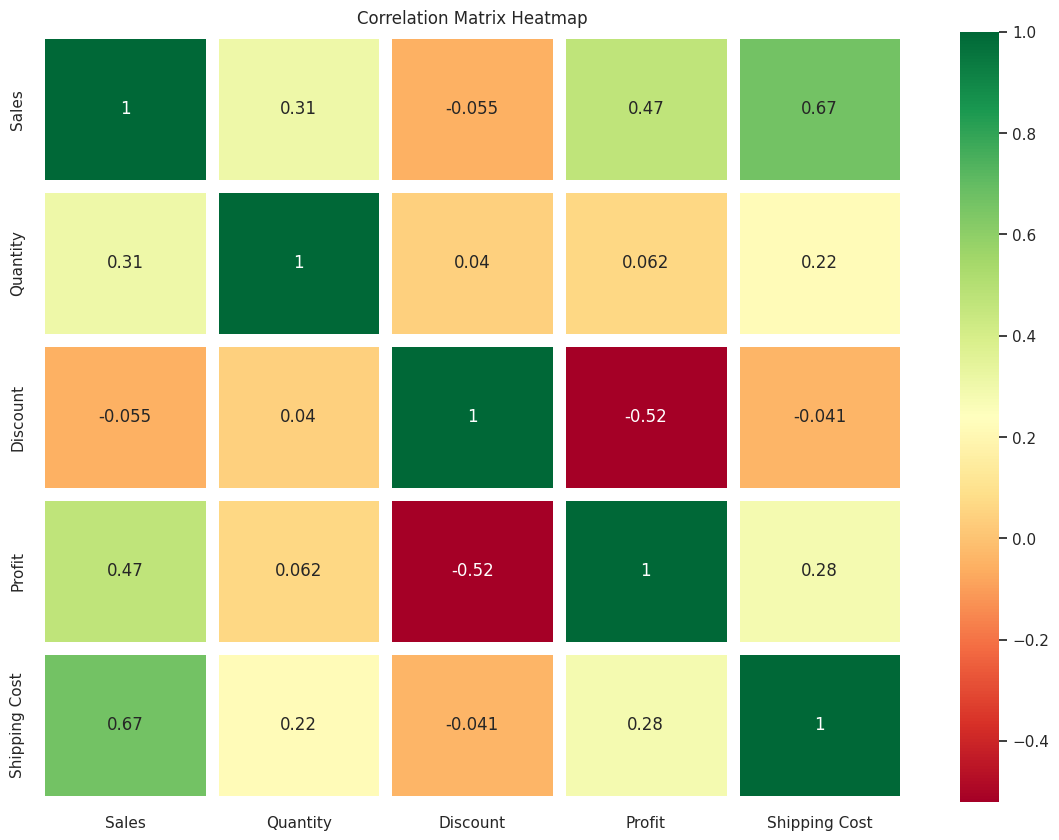

In [154]:
#Selection of numerical columns only
numerical_data = df.select_dtypes(include=['number'])
#Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='RdYlGn', linewidths=9, linecolor='white')
#Plotting the heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

The analysis from above heat map tells us a notable relationship between sales and profit, demonstrating a positive correlation, while the relationship between discount and profit is inversely proportional. This indicates that increased sales are generally associated with higher profit margins, whereas higher discounts and higher shipping cost tend to reduce profitability.






# **Dataset Visualization**

###Univariate Analysis

<ipython-input-123-27d6cfe8db46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


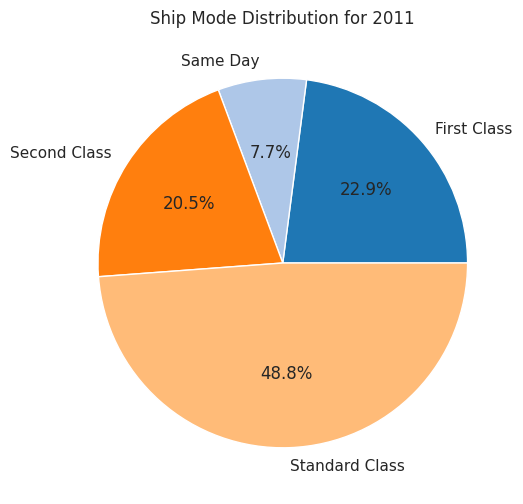

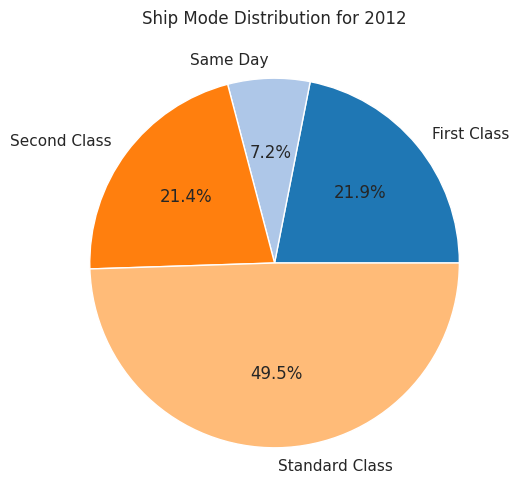

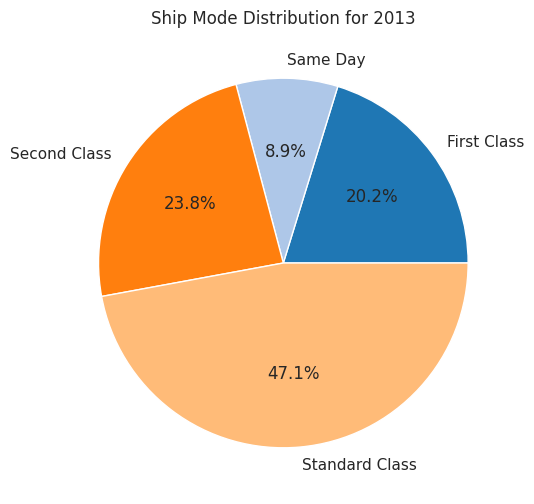

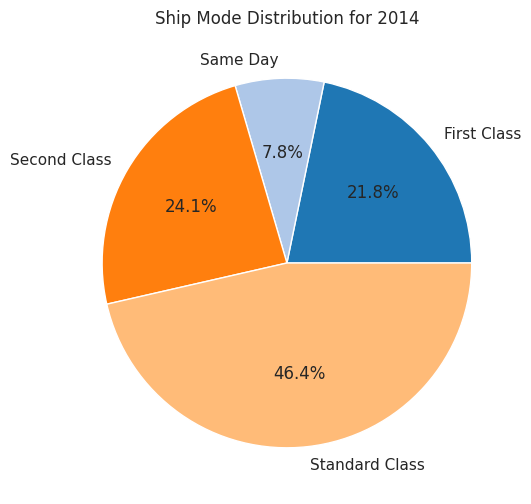

In [123]:
df['Year'] = df['Order Date'].dt.year
ship_mode_distribution = df.groupby(['Year', 'Ship Mode']).size().reset_index(name='Count')
years = ship_mode_distribution['Year'].unique()
for year in years:
    plt.figure(figsize=(8, 6))
    year_data = ship_mode_distribution[ship_mode_distribution['Year'] == year]
    plt.pie(year_data['Count'], labels=year_data['Ship Mode'], autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors)
    plt.title(f'Ship Mode Distribution for {year}')
    plt.show()

From the above graph we can say that there was not much difference in ship mode done from year 2011 to 2014. Most of the shipment were of 'Standard Class' i.e. 45-49% of shipment and it was followed by 'Second Class' and 'First class' ranging from 20-25% of yearly shipment each and only about 7-9% of overall shiment mode were 'Same day' mode.

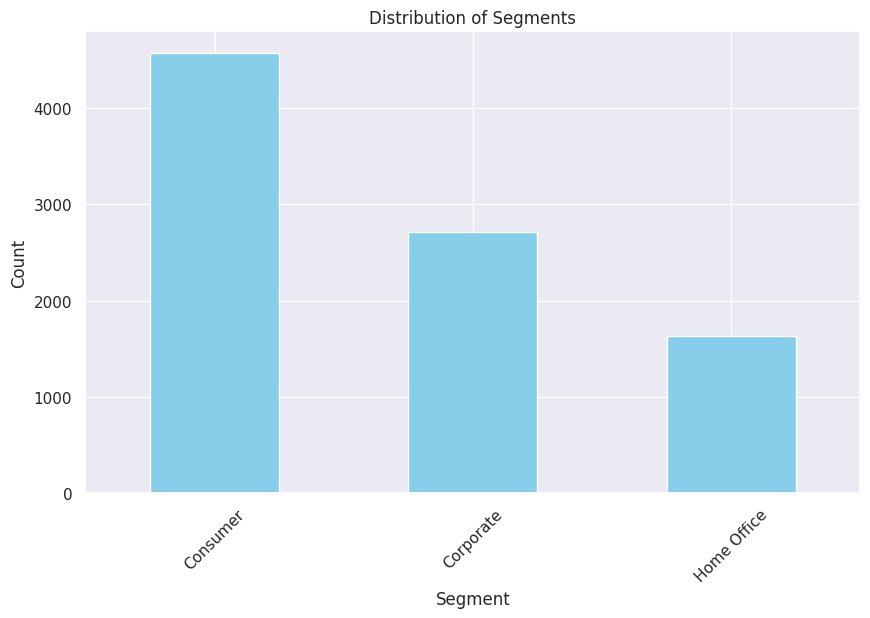

In [125]:
segment_distribution = df['Segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 2400x1500 with 0 Axes>

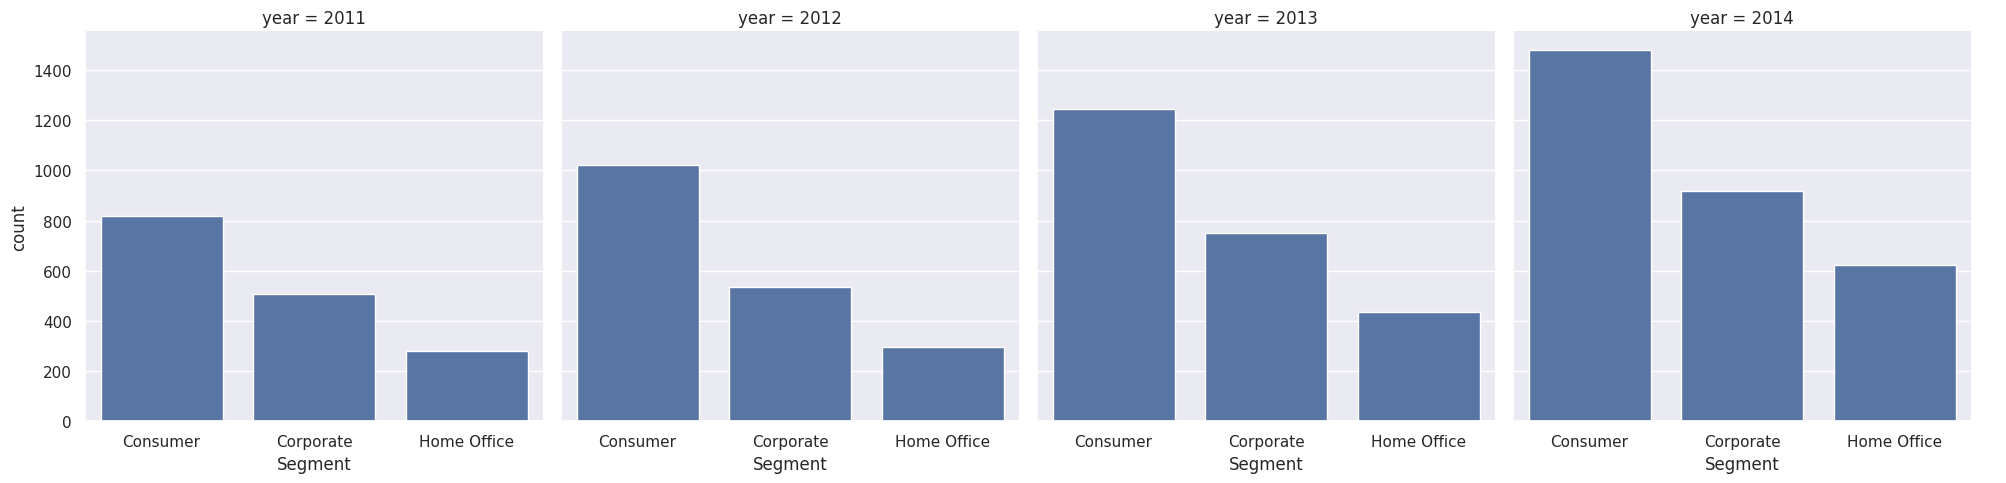

In [126]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="year", data=df, kind="count")
plt.show()

Most of the puchase is done by normal consumer i.e. indivdual and later done by the Corporate Segment and rest done by Home Office for all the year.

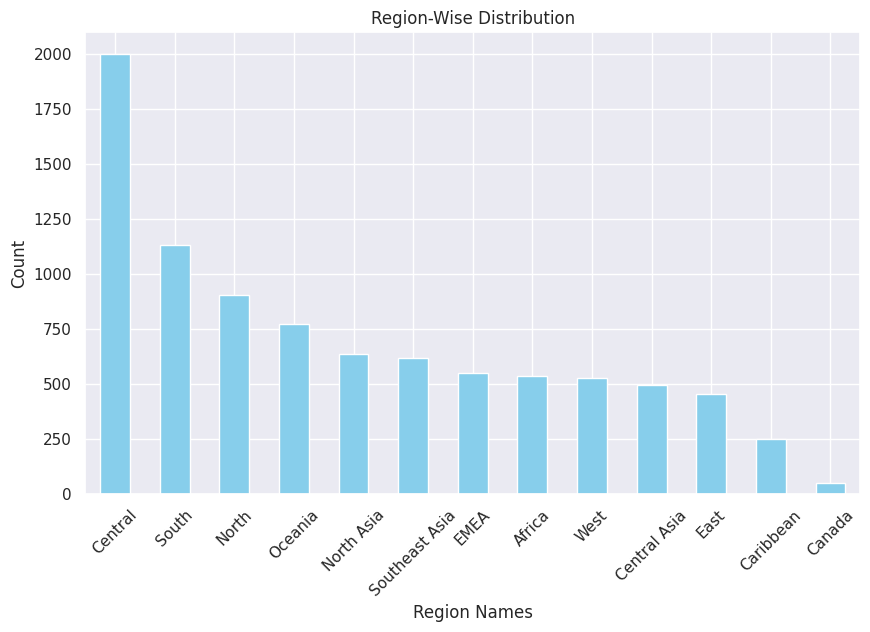

In [128]:
segment_distribution = df['Region'].value_counts()
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Region-Wise Distribution')
plt.xlabel('Region Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the above grpah we can say that most of the purchase was done in the Central part region approx. 2000 and followed by South and North region and the least number of purchase were done in the Canada region in the time frame of 2011-2014.

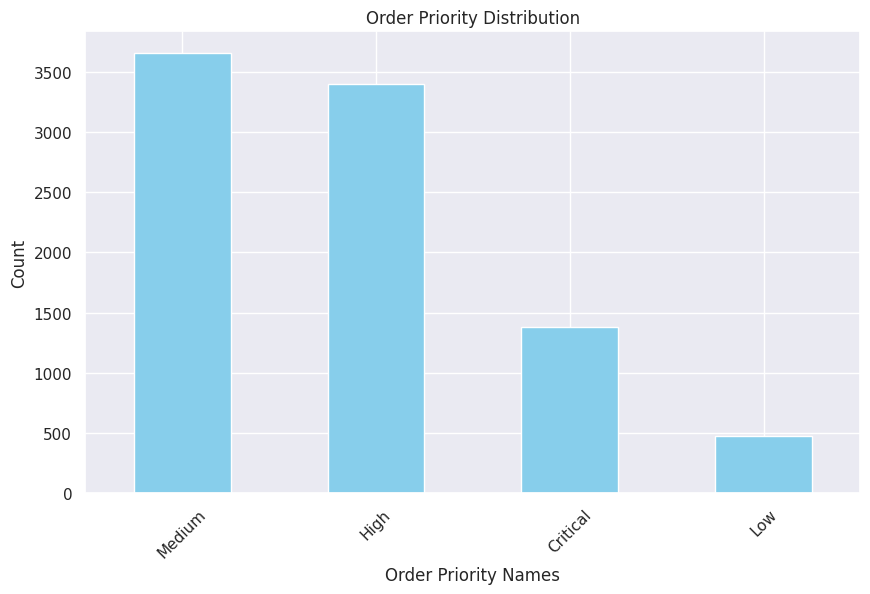

In [129]:
prior_distribution = df['Order Priority'].value_counts()
plt.figure(figsize=(10, 6))
prior_distribution.plot(kind='bar', color='skyblue')
plt.title('Order Priority Distribution')
plt.xlabel('Order Priority Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Fromt the above graph we can see that most of the orders were of Medium priority (around 3500) and approx. 3300 orders were of high priority and only few orders were of critical and low priority.

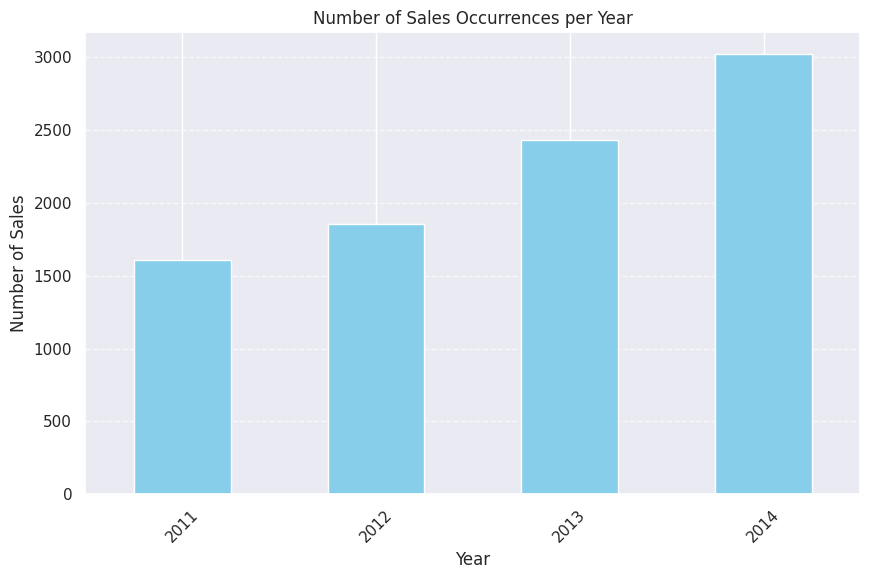

In [130]:
sales_by_year = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Sales Occurrences per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above graph it clearly state that the number of sales are gradually increasing from the year 2011 to 2014.

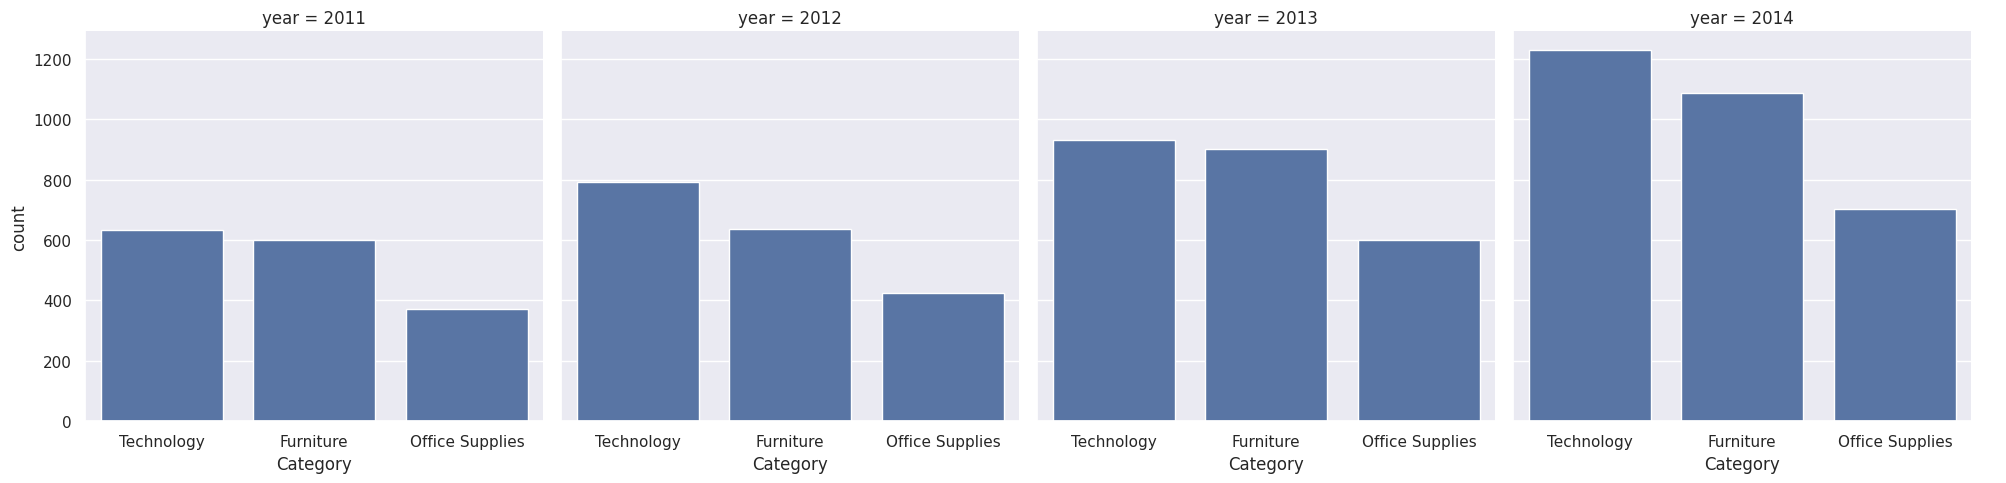

In [132]:
sns.catplot(x="Category", col="year", data=df, kind="count")
plt.show()

For each year maximum purchase was done from technology category and least purchase was done from office supplies category and it shows that the people having more requirement of items belonging to technology category.

### Bivariate or Multivariate analysis

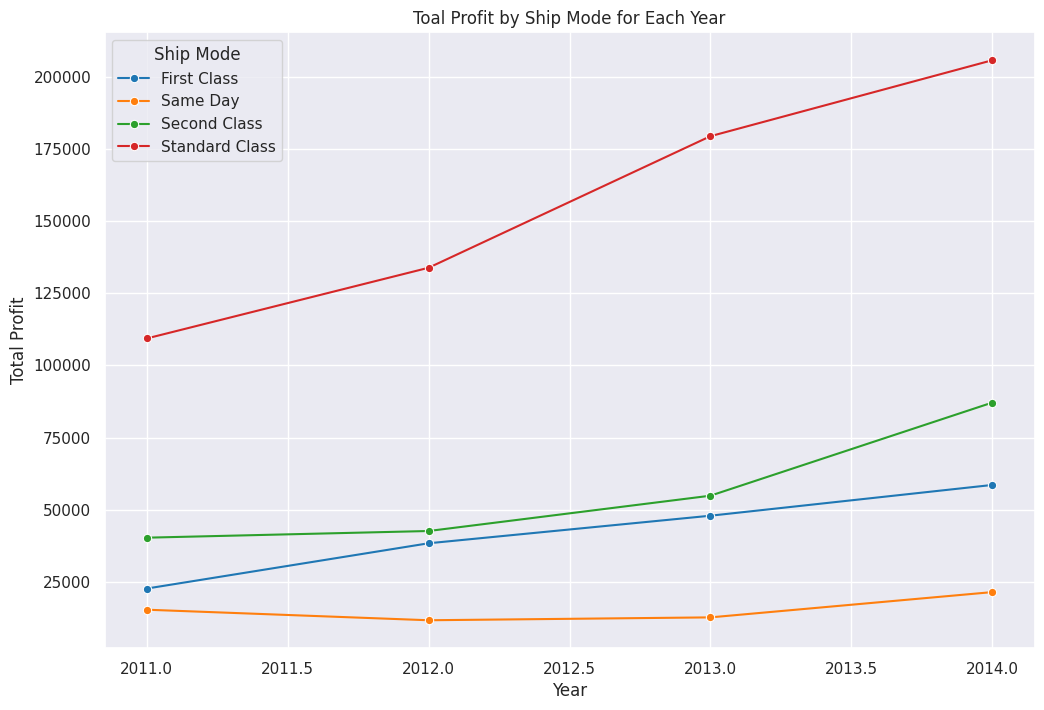

In [134]:
profit_by_year_mode = df.groupby(['Year','Ship Mode'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=profit_by_year_mode, x='Year', y='Profit', hue='Ship Mode', marker='o', palette='tab10')
plt.title('Toal Profit by Ship Mode for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Ship Mode')
plt.grid(True)
plt.show()

From the above line plot we can clearly observe these things:
1. The Standard class given the maximum profit and going from 1.3 lakh to more than 2 lakh in the year 2014 and through it attains a most profitable ship mode.
2. Second Class and First day were moderately profitable.
3. Same day ship mode was the least profitabla and the profit remain less than 25k for each year.



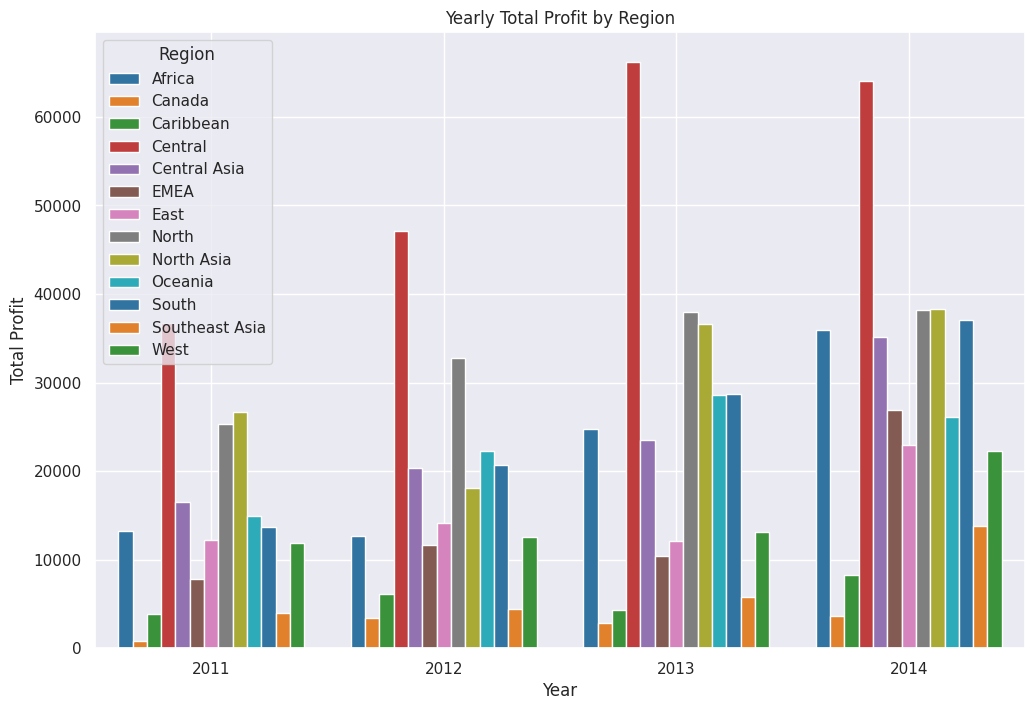

In [136]:
profit_by_region = df.groupby(['Year','Region'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=profit_by_region, x='Year', y='Profit', hue='Region', palette='tab10')
plt.title('Yearly Total Profit by Region')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Central Region was the most profitable giving region and it attained the highest profit of above 60,000 in year 2013 and 2014 while on the other case Canada was the least profitable region with less than 10,000 profit in each year.

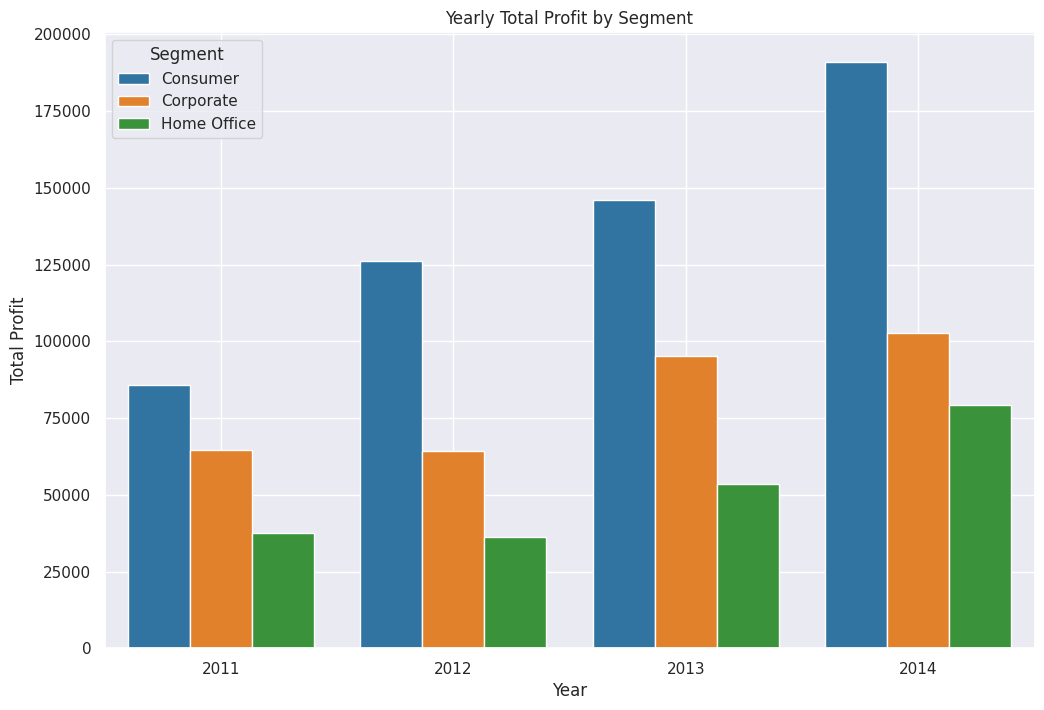

In [138]:
profit_by_segment = df.groupby(['Year', 'Segment'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=profit_by_segment, x='Year', y='Profit', hue='Segment', palette='tab10')
plt.title('Yearly Total Profit by Segment')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

Consumer segment is most profitable and we can also see that for each year the prfit amount is increasing drastically, followed by Corporate Segment in which we can see that it is showing moderate growth in profit and home offices,it shows lowest growth in the profit margin in the cosecutive years.

In [140]:
sub_category_profit = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_profit

,Profit,Sales,Quantity
Sub-Category,,,
Accessori,0.00000,0.000000e+00,0.0
Accessories,88024.63230,3.915373e+05,3107.0
Appliances,127314.59040,8.054802e+05,2826.0
Art,10442.86880,4.447948e+04,1051.0
Binders,31340.62960,1.646718e+05,938.0
Bookcases,157196.53360,1.122586e+06,5312.0
Chairs,118242.32280,1.055281e+06,5869.0
Copiers,233289.58574,1.170542e+06,5125.0
Envelopes,3600.60720,1.300316e+04,346.0


<ipython-input-144-197029097996>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_category_profit.index, x='Profit',data=sub_category_profit, palette='icefire',ax=axes[0])
<ipython-input-144-197029097996>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_category_profit.index, x='Sales', data=sub_category_profit,palette='icefire',ax=axes[1])
<ipython-input-144-197029097996>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_category_profit.index,x='Quantity',data=sub_category_profit,palette='icefire',ax=axes[2])


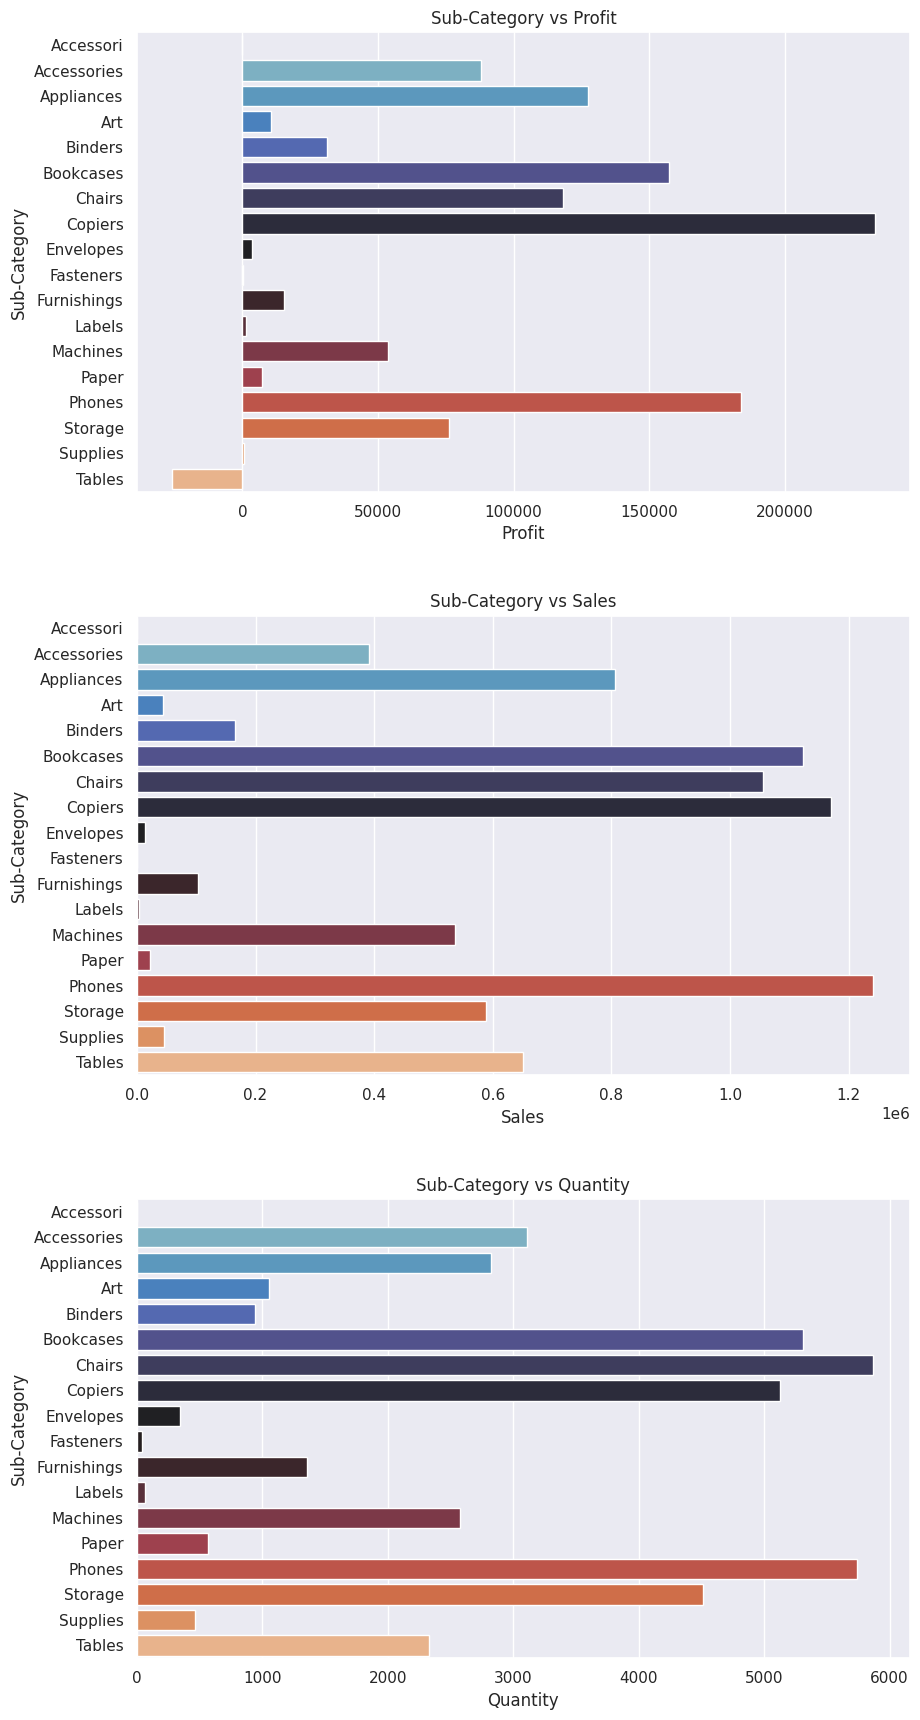

In [144]:
fig, axes = plt.subplots(3,1, figsize=(10,18))
sns.set_theme(style="darkgrid")
# For Sub-Category vs Profit
axes[0].set_title("Sub-Category vs Profit")
sns.barplot(y=sub_category_profit.index, x='Profit',data=sub_category_profit, palette='icefire',ax=axes[0])
#Sub-Category vs Sales
axes[1].set_title("Sub-Category vs Sales")
sns.barplot(y=sub_category_profit.index, x='Sales', data=sub_category_profit,palette='icefire',ax=axes[1])
#Sub-Category vs Quantity
axes[2].set_title("Sub-Category vs Quantity")
sns.barplot(y=sub_category_profit.index,x='Quantity',data=sub_category_profit,palette='icefire',ax=axes[2])
plt.tight_layout(pad=3);

From the above graph we can clearly see that that copiers,chairs,accesories and phones have more sales and profit and through this we can also find out which things we can bundle which can increase the probablity of items being sold more to increase more profit.

In [145]:
city_stats = data.groupby('City')[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit', ascending=False)
# Selecting the top 10 and bottom 10 cities by profit
top_cities = city_stats.head(10)
bottom_cities = city_stats.tail(10)
top_and_bottom_cities = pd.concat([top_cities, bottom_cities])

<ipython-input-146-c302b420f517>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_and_bottom_cities.index,x='Profit', data=top_and_bottom_cities, palette='muted')


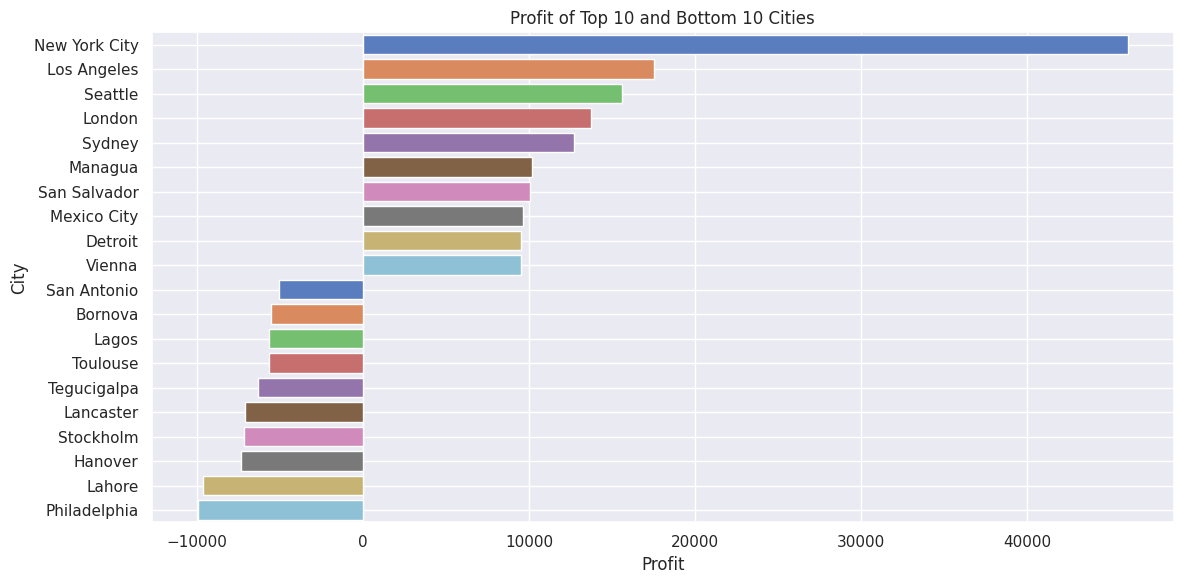

In [146]:
# Plotting the bar chart for Profit
plt.figure(figsize=(12, 6))
sns.barplot(y=top_and_bottom_cities.index,x='Profit', data=top_and_bottom_cities, palette='muted')
plt.title("Profit of Top 10 and Bottom 10 Cities")
plt.xlabel('Profit')
plt.ylabel('City')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above graph we can see that the New york City has got the highest profit (more than 45,000 and later it is followed by Los Angeles and Seattle and these are top 3 profitable cities while on the other hand side we can see that Philadelphia, Lahore ,hanover were the loss making cities as their loss amount is upto 10,000.

<ipython-input-148-caca3550daf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_and_bottom_cities.index,x='Sales',data=top_and_bottom_cities,palette='muted')


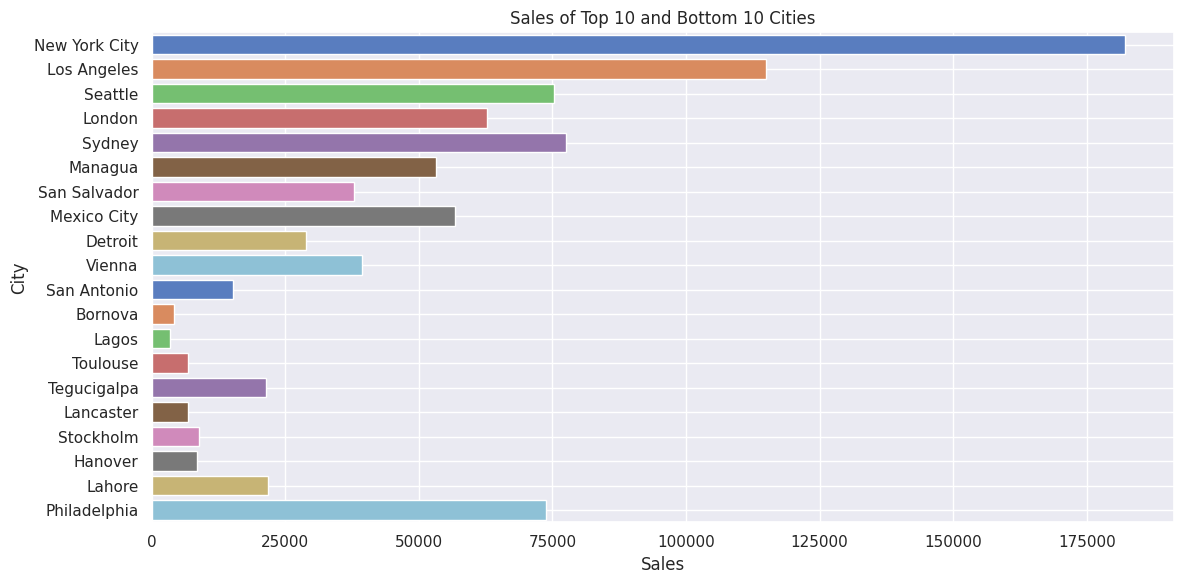

In [148]:
# Plotting the bar chart for Sales
plt.figure(figsize=(12, 6))
sns.barplot(y=top_and_bottom_cities.index,x='Sales',data=top_and_bottom_cities,palette='muted')
plt.title("Sales of Top 10 and Bottom 10 Cities")
plt.xlabel('Sales')
plt.ylabel('City')
plt.grid(True)
plt.tight_layout()
plt.show()

In this graph we can clearly see that the New York City have highest sales i.e.  1.75 lakh and later it is followed by Los Angeles and Seattle and others and on the other side we can see the least sales were in Bornova,Lagos ,Toluse and rest other were having total sales amoun less than 25000 which makes them least purchased city.

<ipython-input-149-25e34e1aadbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_and_bottom_cities.index,x='Quantity',data=top_and_bottom_cities,palette='muted')


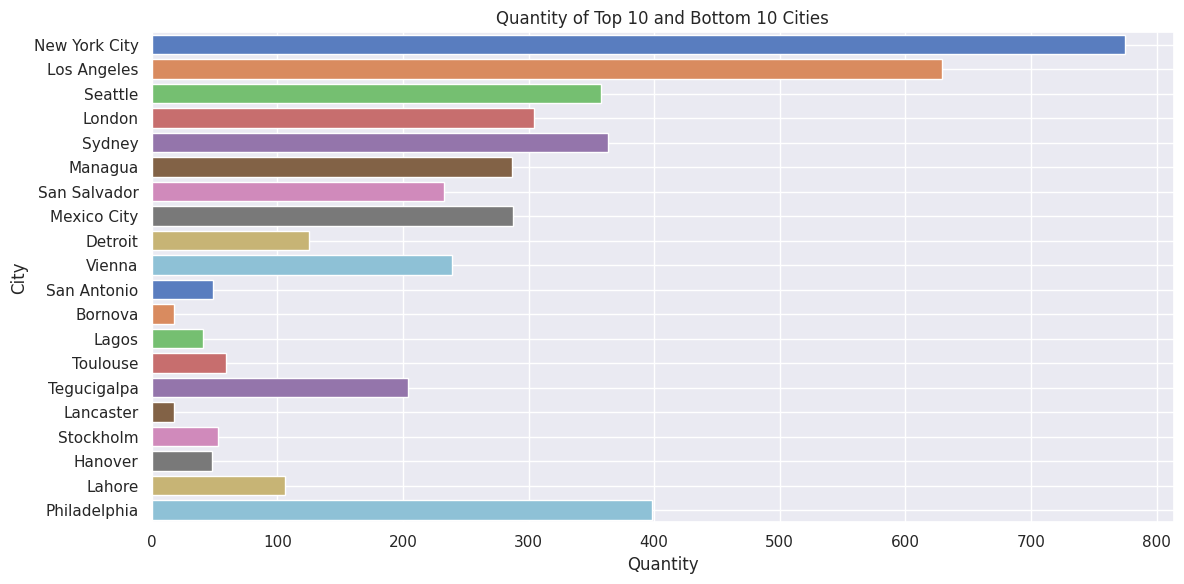

In [149]:
# Plotting the bar chart for Quantity
plt.figure(figsize=(12, 6))
sns.barplot(y=top_and_bottom_cities.index,x='Quantity',data=top_and_bottom_cities,palette='muted')
plt.title("Quantity of Top 10 and Bottom 10 Cities")
plt.xlabel('Quantity')
plt.ylabel('City')
plt.grid(True)
plt.tight_layout()
plt.show()

In this graph we can clearly see that the New York City (around 800 lakh items were sold in total which makes it the most selling city and later it is followed by Los Angeles and Seattle and others and on the other side we can see the least quantities were sold in Bornova,Lagos ,Toluse and rest other were less than 25000 quantities sold which makes them least purchased city.

# **Conclusion**
Sales and profit are positively correlated, with higher sales generally leading
to increased profitability. Discounts, however, negatively impact profits. The Standard Class shipping mode is the most frequent and profitable, while Same Day shipping is the least profitable. The Consumer segment consistently shows the highest profitability, with Central Region leading in profit compared to other regions. Technology products dominate in sales and profit, whereas Office Supplies lag behind. New York City stands out as the most profitable and highest in both sales and quantities sold, while other cities like Philadelphia and Lahore underperform. Overall, focusing on high-selling products(Technology category products) and profitable shipping modes (Standard and Second class) can enhance profitability while dropping shipping cost can also help in profitabolity.